## **DSP Assignment**

###**1. Generate and	plot the elementary signals	in DSP (Impulse, unit impulse, ramp,and exponential	signals).**

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

def unit_step(n):
    unit =[]
    for x in n:
        if x < 0:
            unit.append(0)
        else:
            unit.append(1)
    return(unit)

def unit_impulse(n):
    impulse =[]
    for x in n:
        if x == 0:
            impulse.append(1)
        else:
            impulse.append(0)
    return impulse

def unit_ramp(n):
    ramp = []
    for x in n:
        if x < 0:
            ramp.append(0)
        else:
            ramp.append(x)
    return ramp
    
def exponential_signal(a, n):
    exponent =[]
    for x in n:
        exponent.append(a**x)
    return exponent

def plot_signal(name, a, n):
    y = []
    if name == 'unit_step':
        y = unit_step(n)
    elif name == 'unit_impulse':
        y = unit_impulse(n)
    elif name == 'unit_ramp':
        y = unit_impulse(n)
    elif name == 'exponential':
        y = exponential_signal(a, n)
    plt.stem(n, y, use_line_collection=True)
    plt.xlabel('    n     ')
    plt.ylabel('    Amplitude    ')
    plt.title(name + '_signal')
    plt.show()

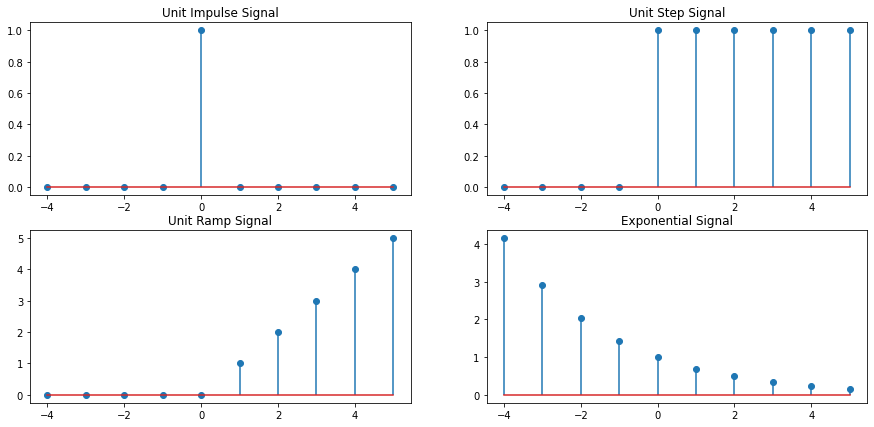

In [ ]:
n = range(-4, 6, 1)
a = 0.7

unit = unit_step(n)
delta = unit_impulse(n)
ramp = unit_ramp(n)
exp = exponential_signal(a, n)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))

ax[0, 0].stem(n, delta, use_line_collection=True)
ax[0, 0].set_title('Unit Impulse Signal')

ax[0, 1].stem(n, unit, use_line_collection=True)
ax[0, 1].set_title('Unit Step Signal')

ax[1,0].stem(n, ramp, use_line_collection=True)
ax[1,0].set_title('Unit Ramp Signal')

ax[1,1].stem(n, exp, use_line_collection=True)
ax[1,1].set_title('Exponential Signal')

plt.show()



###**2. Compute	the	linear	convolution	of	two	signals (Eqn. 2.3.17).**

In [ ]:
from scipy.signal import convolve as conv

def convolution(x, h):
    x_len = len(x)
    h_len = len(h)
    y_len = x_len + h_len - 1
    y = np.zeros(y_len)
    for m in range(x_len):
        for n in range(h_len):
            y[m+n] = y[m+n] + x[m]*h[n]
    return y

signal_x = [1, 2, 1, -1, 3]
signal_h = [1, 2, 3, 1]
print('convolution with my function: ', convolution(signal_x, signal_h)) # using my function
print('convolution with built-in function: ', conv(signal_x, signal_h)) # using built-in function (for checking)


convolution with my function:  [1. 4. 8. 8. 6. 4. 8. 3.]
convolution with built-in function:  [1 4 8 8 6 4 8 3]


###**3. Compute	the	cross-correlation	sequence of	two signals x(n)	and	h(n). [Hint:	2.6.1]**

In [ ]:
import numpy as np

def convolution(x, h):
    x_len = len(x)
    h_len = len(h)
    y_len = x_len + h_len - 1
    y = np.zeros(y_len)
    for m in range(x_len):
        for n in range(h_len):
            y[m+n] = y[m+n] + x[m]*h[n]
    return y

def cross_correlation(x, h):
    h_fold = h[::-1]
    return convolution(np.conj(x), h_fold)

signal_x = [1, 2, 1, -1, 3]
signal_h = [1, 2, 3, 1]

print('cross correlation with my function: ', cross_correlation(signal_x, signal_h))
print('cross correlation with built-in function: ', np.correlate(signal_x, signal_h,'full')) # using built-in function (for checking)


cross correlation with my function:  [1. 5. 9. 7. 4. 8. 5. 3.]
cross correlation with built-in function:  [1 5 9 7 4 8 5 3]


###**4. Determine	the	autocorrelation	sequence	of	the	signal x(n). [Hint:	2.6.1]**

In [ ]:
import numpy as np

def convolution(x, h):
    x_len = len(x)
    h_len = len(h)
    y_len = x_len + h_len - 1
    y = np.zeros(y_len)
    for m in range(x_len):
        for n in range(h_len):
            y[m+n] = y[m+n] + x[m]*h[n]
    return y

def auto_correlation(x):
    x_fold = x[::-1]
    return convolution(np.conj(x), x_fold)

signal_x = [1, 2, 3, -7, 9]

print('auto correlation with my function: ', auto_correlation(signal_x))
print('auto correlation with built-in function: ', np.correlate(signal_x, signal_x,'full')) # using built-in function (for checking)


auto correlation with my function:  [  9.  11.  16. -76. 144. -76.  16.  11.   9.]
auto correlation with built-in function:  [  9  11  16 -76 144 -76  16  11   9]


###**5. Compute	Discrete	Fourier	Transform	(DFT)	of	a	signal using	DFT	equation.**

In [ ]:
import numpy as np
from numpy.fft import fft

def DFT(x):
    x_len = len(x)
    X = np.zeros((x_len), dtype=np.complex128)
    for m in range(x_len):    
        for n in range(x_len): 
            X[m] += x[n] * np.exp(-np.pi * 2j * m * n / x_len)
    return X

x = [0, 1, 2, 3]


print('DFT of the signal using my fuction:')
print(DFT(x).round())

print('DFT of the signal using built-in fuction:\n', fft(x, len(x))) # using built-in function (for checking)

DFT of the signal using my fuction:
[ 6.+0.j -2.+2.j -2.-0.j -2.-2.j]
DFT of the signal using built-in fuction:
 [ 6.+0.j -2.+2.j -2.+0.j -2.-2.j]


###**6. Compute inverse	DFT	of	the	signal	obtained in	(5).	Cross	check	your	results	with	Matlab/	Python library	functions.**

In [ ]:
import numpy as np
from numpy.fft import fft, ifft

def DFT(x):
    x_len = len(x)
    X = np.zeros((x_len), dtype=np.complex128)
    for m in range(x_len):    
        for n in range(x_len): 
            X[m] += x[n] * np.exp(-2j * np.pi * m * n / x_len)
    return X

def IDFT(x):
    x_len = len(x)
    X = np.zeros((x_len), dtype=np.complex128)
    for m in range(x_len):
        for n in range(x_len): 
            X[m] += x[n] * np.exp(2j * np.pi * m * n / x_len)
    X = X/x_len
    X = np.real(X)
    X = np.round(X,decimals=0)
    return X

x = [0, 1, 2, 3, 8]

dft_x = DFT(x)
idft_x = IDFT(dft_x)
print('DFT of the signal using my function: ')
print(dft_x)
print('IDFT of the signal using my function: ')
print(idft_x)

print('\nDFT of the signal using python library: ',)
python_dft_x = fft(x, len(x))
print(python_dft_x)
print('IDFT of the signal using python library: ')
python_idft_x = ifft(python_dft_x)
print(python_idft_x)

DFT of the signal using my function: 
[14.        +0.j         -1.26393202+7.24518087j -5.73606798+3.16344025j
 -5.73606798-3.16344025j -1.26393202-7.24518087j]
IDFT of the signal using my function: 
[0. 1. 2. 3. 8.]

DFT of the signal using python library: 
[14.        +0.j         -1.26393202+7.24518087j -5.73606798+3.16344025j
 -5.73606798-3.16344025j -1.26393202-7.24518087j]
IDFT of the signal using python library: 
[0.+0.j 1.+0.j 2.+0.j 3.+0.j 8.+0.j]


###**7. By	means	of	the	DFT	and	IDFT,	determine	the	response	of	the	FIR	filter	with	impulse	response	h(n)	to	the	input	sequence	x(n). [Hint:	Ex.	7.3.1]**

In [ ]:
import numpy as np
import scipy.signal as signal
from numpy.fft import fft, ifft

def DFT(x):
    x_len = len(x)
    X = np.zeros((x_len), dtype=np.complex128)
    for m in range(x_len): 
        for n in range(x_len): 
            X[m] += x[n] * np.exp(-2j * np.pi * m * n / x_len)
    return X

def IDFT(x):
    x_len = len(x)
    X = np.zeros((x_len), dtype=np.complex128)
    for m in range(x_len):
        for n in range(x_len): 
            X[m] += x[n] * np.exp(2j * np.pi * m * n / x_len)
    X = X/x_len
    X = np.real(X)
    X = np.round(X, decimals=0)
    return X

def FIR(x, h):
    y_len = len(x) + len(h) - 1
    y_len = int(2**(np.ceil(np.log2(y_len))))
    h = np.pad(h, (0, y_len-len(h)),'constant')
    x = np.pad(x, (0, y_len-len(x)),'constant')
    product_dft = DFT(h) * DFT(x)
    y = IDFT(product_dft)
    return y


h = [1, 2, 3]
x = [1, 2, 2, 1]
print('Response of the FIR filter: ', FIR(x, h))
print('Response of the FIR filter using built-in function: ', np.real(ifft(fft(x, 8)*fft(h, 8)).round()))

Response of the FIR filter:  [ 1.  4.  9. 11.  8.  3.  0.  0.]
Response of the FIR filter using built-in function:  [ 1.  4.  9. 11.  8.  3.  0. -0.]


###**8. Compute	the	Fast Fourier Transform (FFT) using divide and conquer	approach (e.g N=2 x	N/2).**

In [ ]:
import numpy as np
import scipy.signal as signal
from numpy.fft import fft, ifft

def DFT(x):
    x_len = len(x)
    X = np.zeros((x_len), dtype=np.complex128)
    for m in range(x_len): 
        for n in range(x_len): 
            X[m] += x[n] * np.exp(-2j * np.pi * m * n / x_len)
    return X

def factorize(n, x):
    i = 2
    while i * i < n :
        if n % i == 0:
            return i, int(n//i), x, len(x)
        i += 1
    # if prime, x is padded
    x = np.pad(x, (0, 1),'constant')
    return int(n//2)+1, 2, x, len(x)

def twiddle_factor(ll, q, n):
    w = np.exp((-2j * np.pi * ll * q) / n)
    return w

def DFT_2D(matrix):
   DFT_rows = [DFT(row) for row in matrix]
   return DFT_rows

def FFT_divide_and_conquer_2(x):
    n = len(x)

    #for calculating l, m [n=l*m], n(x_len), padding x if needed
    l, m, x, n = factorize(n, x)
    check_x = x # for comparing with built-in function
    
    #column_wise store
    x = np.transpose(x.reshape((l,m)))
    
    #m point DFT of each row
    f_lq = DFT_2D(x)

    #phase factor w_lq
    l1 = np.arange(l)
    q = np.arange(m).reshape((m, 1))
    #print(l1.shape, q.shape)
    w_lq = twiddle_factor(l1, q, n)

    #multiply with phase factor w_lq
    g_lq = f_lq * w_lq

    #l point DFT of each column
    x_pq = np.transpose(DFT_2D(np.transpose(g_lq))).ravel()

    return x_pq, check_x


x = np.arange(8)
result, check_x = FFT_divide_and_conquer_2(x)

print('FFT of a given signal using divide and conquer approach:\n', result)
print('\nFFT of a given signal using built-in function:\n', fft(check_x)) #for matching the result

FFT of a given signal using divide and conquer approach:
 [28.+0.00000000e+00j -4.+9.65685425e+00j -4.+4.00000000e+00j
 -4.+1.65685425e+00j -4.-2.44929360e-15j -4.-1.65685425e+00j
 -4.-4.00000000e+00j -4.-9.65685425e+00j]

FFT of a given signal using built-in function:
 [28.+0.j         -4.+9.65685425j -4.+4.j         -4.+1.65685425j
 -4.+0.j         -4.-1.65685425j -4.-4.j         -4.-9.65685425j]


###**9. Compute	the	FFT	of	a	given	signal	with	N =	8	using	Radix-2	algorithm**

In [16]:
import numpy as np
import scipy.signal as signal
from numpy.fft import fft, ifft

def input_padding(input):
    current_size = len(input)
    required_length = int(2**(np.ceil(np.log2(current_size))))
    padding_length = required_length - current_size
    input = np.pad(input, (0, padding_length),'constant')
    return input

def FFT_radix(x, n):
    x = np.asarray(x, dtype=complex)
    n = len(x)

    if n <= 1:
        return x
    else:
        x_even = FFT_radix(x[::2], n//2)  # even part
        x_odd = FFT_radix(x[1::2], n//2)  # odd part
        combined = n * [0]

        for i in range(n//2):
            twiddle = np.exp(-2j * np.pi * i / n)
            combined[i] = x_even[i] + x_odd[i] * twiddle
            combined[i+n//2] = x_even[i] - x_odd[i] * twiddle

    return np.array(combined)

x = np.arange(7)
x_padded = input_padding(x)
print('\nFFT of a given signal with N = 8 using Radix-2 algorithm:\n', FFT_radix(x_padded, len(x_padded))) 
print('\nFFT of a given signal with N = 8 using built_in function:\n', fft(x_padded, len(x_padded))) # check


FFT of a given signal with N = 8 using Radix-2 algorithm:
 [21.        +0.j         -8.94974747+4.70710678j -4.        -3.j
  0.94974747-3.29289322j  3.        +0.j          0.94974747+3.29289322j
 -4.        +3.j         -8.94974747-4.70710678j]

FFT of a given signal with N = 8 using built_in function:
 [21.        +0.j         -8.94974747+4.70710678j -4.        -3.j
  0.94974747-3.29289322j  3.        +0.j          0.94974747+3.29289322j
 -4.        +3.j         -8.94974747-4.70710678j]
